## Defining Functions, Comparing Reconstructions

### Overview
This notebook goes through the following themes:
- Defining functions to avoid code duplication
- Using user-defined functions to efficiently compare aspects of reconstruction models

### Part 1
The code below is largely copied from the 'pygplates-motion-paths' tutorial. It computes a reconstructed motion path from a given rotation file, given some required parameters like the seed point, time range and increment, plate ids. (if you are unfamiliar with motion paths, it is worth trying to make one in GPlates so you can see what they look like and how the creation steps work)


In [1]:
import numpy as np
import pygplates
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

rotation_filename = 'Data/Seton_etal_ESR2012_2012.1.rot'

# Required parameters for a motion path feature
SeedPoint = (30,78)
MovingPlate = 801
RelativePlate = 0
TimeStep = 5
times = np.arange(0,200,TimeStep)

# Create the motion path feature
digitisation_time = 0
seed_points_at_digitisation_time = pygplates.MultiPointOnSphere([SeedPoint])
motion_path_feature = pygplates.Feature.create_motion_path(
        seed_points_at_digitisation_time,
        times,
        valid_time=(200, 0),
        relative_plate=RelativePlate,
        reconstruction_plate_id = MovingPlate)

# At this point all we have done is define a motion path feature - now, we want to use a specific rotation model
# to derive the predicted motion path from that model

rotation_model = pygplates.RotationModel(rotation_filename)

# Create the shape of the motion path
reconstruction_time = 0
reconstructed_motion_paths = []
pygplates.reconstruct(
        motion_path_feature, rotation_model, reconstructed_motion_paths, reconstruction_time,
        reconstruct_type=pygplates.ReconstructType.motion_path)

# get the reconstructed coordinates into numpy arrays
for reconstructed_motion_path in reconstructed_motion_paths:
    trail = reconstructed_motion_path.get_motion_path().to_lat_lon_array()
    

The array called 'trail' contains the lat/long coordinates of the motion path, which are based on reconstructing the seed point to the list of times in the 'times' array that we specified. The shape of the array is (40,2), the number of rows and columns respectively.

To plot just the latitude, we can index into the first column.


(40, 2)


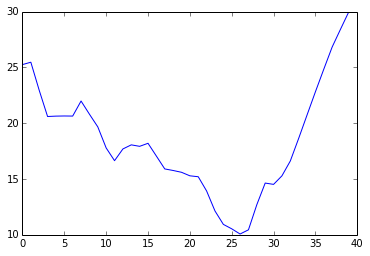

In [2]:
print trail.shape

plt.plot(trail[:,0])
plt.show()


### Defining a function to compute motion paths

Often when we've written some useful code, we want to use it over and over again for different permuations of a problem. To avoid having to cut and paste the same code over and over again into different scripts. 

A solution is to define our own python functions, where we decide which parts of the process we may want to vary.



In [3]:
def innumeracy(x,y):
    z = x+y+1.
    print '%d + %d = %d' % (x,y,z)


When you run the cell above, you won't see anything happen on the screen - rather, we have defined a function that can then be called 

In [4]:
innumeracy(2,2)
innumeracy(7,2)

2 + 2 = 5
7 + 2 = 10


In addition to printing the answer to the screen, we can return the answer into an array.

In [6]:
def innumeracy(x,y):
    z = x+y+1.
    return z

z1 = innumeracy(12,100)
print z1

113.0


### Exercise

The pygplates tutorial includes a number of examples for how to create motion paths. 

Your mission is:
- pick one of the examples in the 'pygplates-motion-paths' tutorial, the choice is up to you.
- to define a function that will take some user-specified parameters (the seed point for the motion path, the plate id, the name of the rotation file), 
- the function can be called by a single line of code and returns either a plot of the motion path, or, returns an array of motion path coordinates. In this second case, you can make multiple calls to the same function (With the input varying in each call, such that you



In [7]:
## SOLUTION 1
def get_motion_path(rotation_filename,SeedPoint,MovingPlate,RelativePlate,times):
    
    # Create a motion path feature
    digitisation_time = 0
    seed_points_at_digitisation_time = pygplates.MultiPointOnSphere([SeedPoint]) 
    motion_path_feature = pygplates.Feature.create_motion_path(
            seed_points_at_digitisation_time,
            times,
            valid_time=(200, 0),
            relative_plate=RelativePlate,
            reconstruction_plate_id = MovingPlate)

    # Create the shape of the motion path
    reconstruction_time = 0
    reconstructed_motion_paths = []
    pygplates.reconstruct(
            motion_path_feature, rotation_filename, reconstructed_motion_paths, reconstruction_time,
            reconstruct_type=pygplates.ReconstructType.motion_path)

    # get the reconstructed coordinates into numpy arrays
    for reconstructed_motion_path in reconstructed_motion_paths:
        trail = reconstructed_motion_path.get_motion_path().to_lat_lon_array()
      
    # when returning the trail, here we flip the array so that the order 
    # matches the 'times' array that we define as an input
    return np.flipud(trail)


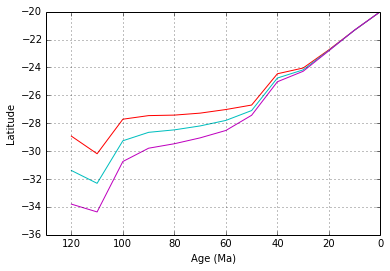

In [8]:
#### EXAMPLE USAGE 1
# Plot curves for three seed points on Africa
rotation_filename = 'Data/Seton_etal_ESR2012_2012.1.rot'
MovingPlate = 701
RelativePlate = 0
times = np.arange(0,130,10)

# get motion paths for three different points in Africa, at the same latitude but
# different longitudes
trail_1 = get_motion_path(rotation_filename,(-20,0),MovingPlate,RelativePlate,times)
trail_2 = get_motion_path(rotation_filename,(-20,5),MovingPlate,RelativePlate,times)
trail_3 = get_motion_path(rotation_filename,(-20,10),MovingPlate,RelativePlate,times)

plt.plot(times,trail_1[:,0],'r')
plt.plot(times,trail_2[:,0],'c')
plt.plot(times,trail_3[:,0],'m')
plt.xlim(130,0)
plt.xlabel('Age (Ma)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

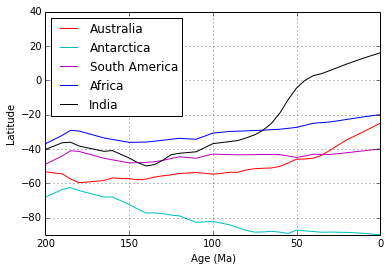

In [9]:
#### EXAMPLE USAGE 1
# Plot curves for three seed points on Africa
rotation_filename = 'Data/Seton_etal_ESR2012_2012.1.rot'
MovingPlate = 701
RelativePlate = 0
times = np.arange(0,201,5)

# get motion paths for three different points in Africa, at the same latitude but
# different longitudes
trail_1 = get_motion_path(rotation_filename,(-25,140),801,RelativePlate,times)
trail_2 = get_motion_path(rotation_filename,(-90,0),802,RelativePlate,times)
trail_3 = get_motion_path(rotation_filename,(-40,-50),201,RelativePlate,times)
trail_4 = get_motion_path(rotation_filename,(-20,10),701,RelativePlate,times)
trail_5 = get_motion_path(rotation_filename,(16,78),501,RelativePlate,times)

plt.plot(times,trail_1[:,0],'r',label='Australia')
plt.plot(times,trail_2[:,0],'c',label='Antarctica')
plt.plot(times,trail_3[:,0],'m',label='South America')
plt.plot(times,trail_4[:,0],'b',label='Africa')
plt.plot(times,trail_5[:,0],'k',label='India')
plt.xlim(200,0)
plt.ylim(-90,40)
plt.xlabel('Age (Ma)')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.grid()
plt.show()

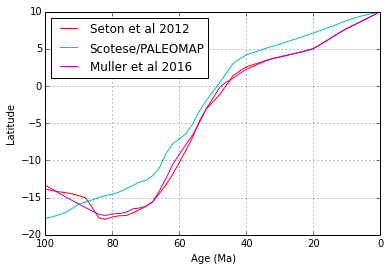

In [10]:
#### EXAMPLE USAGE 2

# specify filenames for three alternative rotation models
rotation_filename1 = 'Data/Seton_etal_ESR2012_2012.1.rot'
rotation_filename2 = 'Data/PALEOMAP_PlateModel.rot'
rotation_filename3 = 'Data/Global_EarthByte_230-0Ma_GK07_AREPS.rot'
SeedPoint = (10,51)
MovingPlate = 501
RelativePlate = 301
times = np.arange(0,101,2)

# call the function for each rotation model, all other parameters remaining the same
trail_1 = get_motion_path(rotation_filename1,SeedPoint,MovingPlate,RelativePlate,times)
trail_2 = get_motion_path(rotation_filename2,SeedPoint,MovingPlate,RelativePlate,times)
trail_3 = get_motion_path(rotation_filename3,SeedPoint,MovingPlate,RelativePlate,times)

plt.plot(times,trail_1[:,0],'r',label='Seton et al 2012')
plt.plot(times,trail_2[:,0],'c',label='Scotese/PALEOMAP')
plt.plot(times,trail_3[:,0],'m',label='Muller et al 2016')
plt.xlim(100,0)
plt.xlabel('Age (Ma)')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.grid()
plt.show()
